# Image processing reverse engineering with NN
### www.elmomentodecisivo.com

## Libraries needed

In [1]:
import os
import imageio  # read/write image formats

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor  # our MLP!
import pickle  # to save/load the model

## Read images (training set)

In [2]:
features = imageio.imread('./RGB16Million.png')  # by www.brucelindbloom.com
targets = imageio.imread('./RGB16Milliontransformed.png')

HEIGHT = features.shape[0]
WIDTH = features.shape[1]

print("Images have HEIGHT =", HEIGHT, "and WIDTH =", WIDTH)
print("Total number of training examples is", HEIGHT*WIDTH)

Images have HEIGHT = 4096 and WIDTH = 4096
Total number of training examples is 16777216


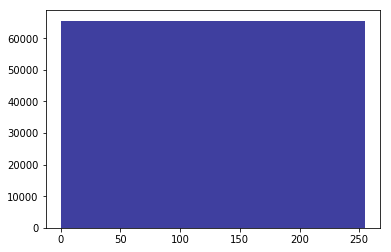

In [3]:
# Features histogram (flat since it contains once every possible value)
R = features[:, :, 0].flatten()
G = features[:, :, 1].flatten()
B = features[:, :, 2].flatten()

plt.hist(R, bins=256, color='r', alpha=0.5)
plt.hist(G, bins=256, color='g', alpha=0.5)
plt.hist(B, bins=256, color='b', alpha=0.5)
plt.show();

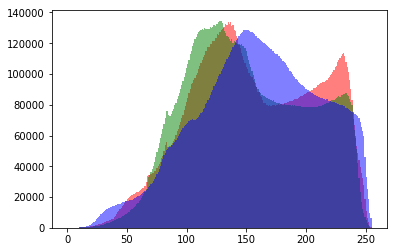

In [4]:
# Targets histogram
R_ = targets[:, :, 0].flatten()
G_ = targets[:, :, 1].flatten()
B_ = targets[:, :, 2].flatten()

plt.hist(R_, bins=256, color='r', alpha=0.5)
plt.hist(G_, bins=256, color='g', alpha=0.5)
plt.hist(B_, bins=256, color='b', alpha=0.5)
plt.show();

## Neural Network training

In [5]:
# Convert images into long 2D arrays in the [0..1] range
X = np.column_stack((R, G, B)) / 255
Y = np.column_stack((R_, G_, B_)) / 255

In [6]:
# Save memory
del features, targets, R, G, B, R_, G_, B_
# %whos

In [7]:
# Load mlp (if already trained and saved)
#"""
with open('mlp_64_64_logistic_identity.pkl', 'rb') as f:
    regr = pickle.load(f)
#"""

In [8]:
# Train mlp
# hidden: mejor logistic (aclara) que relu (oscurece)
# output: da igual identity que relu
regr = MLPRegressor(solver='adam',  # solver algorithm ('sgd', lbfgs')
                    alpha=0,        # no L2 (ridge regression) regularization
                    hidden_layer_sizes=(64, 64),  # tuple setting layers and nodes
                    activation='tanh',      # hidden layer activation function (default 'relu') 
                                            # 'logistic' (sigmoid) seems adequate for continuous functions
                    max_iter=40,            # max epochs
                    tol=0.0000001,          # tolerance for early stopping
                    n_iter_no_change=10,    # number of epochs to check tol
                    random_state=42,        # reproducible training guaranteed
                    verbose=True)           # tell me a story
regr.out_activation_ = 'relu'  # output layer activation function (default 'identity')
                               # 'relu' seems adequate since RGB values are >=0
regr.fit(X, Y)

Iteration 1, loss = 0.00019948
Iteration 2, loss = 0.00003499
Iteration 3, loss = 0.00002311
Iteration 4, loss = 0.00001887
Iteration 5, loss = 0.00001601
Iteration 6, loss = 0.00001406
Iteration 7, loss = 0.00001266
Iteration 8, loss = 0.00001166
Iteration 9, loss = 0.00001096
Iteration 10, loss = 0.00001037
Iteration 11, loss = 0.00000990
Iteration 12, loss = 0.00000950
Iteration 13, loss = 0.00000917
Iteration 14, loss = 0.00000887
Iteration 15, loss = 0.00000862
Iteration 16, loss = 0.00000837
Iteration 17, loss = 0.00000818
Iteration 18, loss = 0.00000798
Iteration 19, loss = 0.00000783
Iteration 20, loss = 0.00000766
Iteration 21, loss = 0.00000751
Iteration 22, loss = 0.00000738
Iteration 23, loss = 0.00000725
Iteration 24, loss = 0.00000713
Iteration 25, loss = 0.00000701
Iteration 26, loss = 0.00000689
Iteration 27, loss = 0.00000679
Iteration 28, loss = 0.00000668
Iteration 29, loss = 0.00000658
Iteration 30, loss = 0.00000651
Iteration 31, loss = 0.00000641
Iteration 32, los

MLPRegressor(activation='tanh', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=40, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=1e-07,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [10]:
# Save mlp model
with open('mlp_64_64_tanh_relu.pkl', 'wb') as f:
    pickle.dump(regr, f)

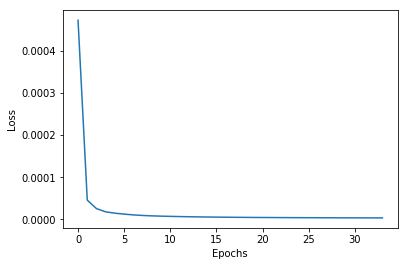

In [8]:
plt.plot(regr.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('Epochs');

In [9]:
# NN weights
regr.coefs_

[array([[ 3.82909901e+00, -1.99658410e+00,  4.17425280e-01,
         -8.13774435e+00, -1.01730165e+00, -6.63953168e-01,
         -6.95426358e+00,  8.39479543e-01, -1.53702142e+00,
          1.40498719e-01, -1.73488332e+00,  4.10280064e-01,
         -2.12911537e+00, -2.50745367e+00, -4.02648204e+00,
          5.64549277e+00, -6.91926394e+00, -6.23322104e+00,
         -3.06435137e+00,  7.89709063e-01, -8.27043872e-01,
         -2.89511210e+00, -9.47588030e+00,  2.73900790e+00,
          3.07403808e+00,  9.66458308e+00,  3.42063984e+00,
         -1.33528246e+01, -2.59281472e+00, -4.48924652e+00,
          1.09650330e+01, -1.86320836e+00, -1.11597599e+00,
          2.33822737e+00, -3.50681625e-01,  5.83176984e-01,
         -4.69299484e+00, -6.61733310e+00, -1.46453626e+00,
         -1.34963395e+00, -5.25418765e-01,  1.83508906e+01,
          5.72399848e-01,  1.17742576e+00, -3.02116613e+00,
         -1.58582254e-01, -3.70021589e+00,  5.34405353e+00,
         -1.17832503e+00,  4.03063775e-0

In [10]:
# NN biases
regr.intercepts_

[array([ 0.39677249, -5.48130453, -8.10364306, -0.7364497 , -0.84342583,
        -2.72625654, -2.09201806,  2.61235013, -0.35019585, -3.78649473,
        -4.2346459 , -3.7722105 , -1.87750691,  3.31420111,  0.36334218,
        -0.08159369, -1.01803329,  3.83344698,  0.30787307, -0.23594994,
        -0.15698184,  0.32040035, -0.43900819,  1.98007637, -0.41719791,
        -5.81546011, -2.01192844,  1.64888333,  2.50556433, -1.70733005,
        -2.51640144, -0.64564182, -1.17070003, -4.40536075, -0.38105398,
        -1.81521235,  2.09330602,  0.02489783, -0.48295433,  0.50645828,
        -0.37261748, -3.88789487, -6.24666   , -2.71374398, -1.46344546,
        -0.42605438,  1.57213813, -4.13081088, -4.36608897, -3.21297349,
        -2.28389195, -1.34237489, -2.32679092,  0.27579859, -4.1933917 ,
        -2.16991531,  6.65876986, -1.12140083, -3.95593961, -1.05779527,
        -0.3319016 , -3.71530439,  8.27851394, -3.43085095]),
 array([ 0.73293549,  0.09564916, -0.4115014 , -0.02208561, -0

## Neural Network prediction

In [11]:
# Read image to process (unknown to the NN)
to_predict = imageio.imread('./wendolin.png')

HEIGHT = to_predict.shape[0]
WIDTH = to_predict.shape[1]

# Extract RGB channels
R = to_predict[:, :, 0].flatten()
G = to_predict[:, :, 1].flatten()
B = to_predict[:, :, 2].flatten()

X = np.column_stack((R, G, B)) / 255

In [12]:
# Prediction
Y_pred = regr.predict(X)

# Keep in range [0..1]
Y_pred[Y_pred < 0] = 0.0
Y_pred[Y_pred > 1] = 1.0

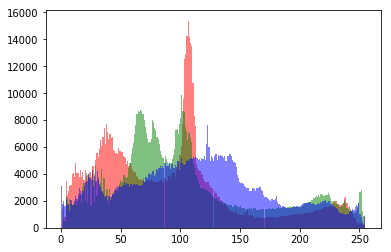

In [13]:
# Prediction histogram
R_ = np.round(Y_pred[:, 0] * 255).astype(int)
G_ = np.round(Y_pred[:, 1] * 255).astype(int)
B_ = np.round(Y_pred[:, 2] * 255).astype(int)

plt.hist(R_, bins=256, color='r', alpha=0.5)
plt.hist(G_, bins=256, color='g', alpha=0.5)
plt.hist(B_, bins=256, color='b', alpha=0.5)
plt.show();

In [14]:
# Build prediction image
R_pred = Y_pred[:, 0].reshape(HEIGHT, WIDTH)
G_pred = Y_pred[:, 1].reshape(HEIGHT, WIDTH)
B_pred = Y_pred[:, 2].reshape(HEIGHT, WIDTH)

prediction = np.zeros((HEIGHT, WIDTH, 3), dtype=np.float64)
prediction[:, :, 0] = R_pred
prediction[:, :, 1] = G_pred
prediction[:, :, 2] = B_pred

prediction = np.round(prediction * 255).astype('uint8')  # range [0..255]

print("Min / Max predicted values:", np.min(prediction), "/", np.max(prediction))

Min / Max predicted values: 0 / 255


In [17]:
# Save prediction
imageio.imwrite('pred_wendolin_64_64_logistic_identity.png', prediction)